# Predicting whether someone will buy a caravan insurance policy.

The task is to predict if customer is interested in buying a Caravan(a vehicle equipped for living in) insurance so that the 
company can identify potential customers.

The dataset was used for the Coil 2000 data mining competition. It contains customer data for an insurance company. The feature of interest is whether or not a customer buys a caravan insurance. Per possible customer, 86 attributes are given: 43 socio-demographic variables derived via the customer's ZIP area code, and 43 variables about ownership of other insurance policies.

In [315]:
# import the required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import naive_bayes
import math
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [582]:
# Read the train and test data into dataframe X and test respectively

X = pd.read_csv("H:/Linux/tic/train1.csv")
Xtest = pd.read_csv("H:/Linux/tic/test.csv")

In [177]:
# View the train data

X

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
5,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
6,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,0
7,33,1,2,3,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0
8,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,0
9,11,2,3,3,3,3,5,0,2,7,...,0,0,0,1,0,0,0,0,0,0


In [178]:
# View the test data

Xtest

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
5,30,1,2,4,7,1,4,2,3,5,...,0,0,0,0,2,0,0,0,0,0
6,35,1,2,4,8,2,5,1,2,8,...,0,0,0,0,1,0,0,0,0,0
7,6,1,3,3,2,3,4,2,2,9,...,0,0,0,0,0,0,0,0,0,0
8,4,1,2,4,1,0,7,2,0,9,...,0,0,0,0,1,0,0,0,0,0
9,10,1,4,2,3,0,7,0,2,9,...,0,0,0,0,1,0,0,0,0,1


In [579]:
# Set the variable to predict

y = X.pop("CARAVAN")

# Exploring the data

In [180]:
# Size of training dataset
X.shape

(5822, 85)

In [260]:
# Size of test dataset
Xtest.shape

(4000, 85)

The train dataset has 5822 observations and 86 variables wheras the test data has 4000 observations.

In [46]:
# Drop rows with missing values
X.dropna()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
5,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
6,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,0
7,33,1,2,3,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0
8,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,0
9,11,2,3,3,3,3,5,0,2,7,...,0,0,0,1,0,0,0,0,0,0


As we can see no rows were removed. So there are no missing values in our dataset.

In [45]:
X.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [53]:
# Number of customers who have a Caravan insurance policy
X.CARAVAN.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [55]:
5474.00/5822.00

0.9402267262109241

94% of the customers in train data doesn't have a Caravan Insurance Policy

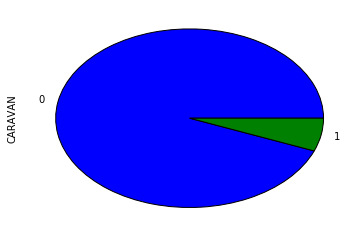

In [575]:
X.CARAVAN.value_counts().plot(kind='pie')

The data are unbalanced: only 5 to 6% of the customers in the training data set actually buy the insurance policy

In [35]:
# List the columns in dataframe X
X.columns

Index([u'MOSTYPE', u'MAANTHUI', u'MGEMOMV', u'MGEMLEEF', u'MOSHOOFD',
       u'MGODRK', u'MGODPR', u'MGODOV', u'MGODGE', u'MRELGE', u'MRELSA',
       u'MRELOV', u'MFALLEEN', u'MFGEKIND', u'MFWEKIND', u'MOPLHOOG',
       u'MOPLMIDD', u'MOPLLAAG', u'MBERHOOG', u'MBERZELF', u'MBERBOER',
       u'MBERMIDD', u'MBERARBG', u'MBERARBO', u'MSKA', u'MSKB1', u'MSKB2',
       u'MSKC', u'MSKD', u'MHHUUR', u'MHKOOP', u'MAUT1', u'MAUT2', u'MAUT0',
       u'MZFONDS', u'MZPART', u'MINKM30', u'MINK3045', u'MINK4575',
       u'MINK7512', u'MINK123M', u'MINKGEM', u'MKOOPKLA', u'PWAPART',
       u'PWABEDR', u'PWALAND', u'PPERSAUT', u'PBESAUT', u'PMOTSCO', u'PVRAAUT',
       u'PAANHANG', u'PTRACTOR', u'PWERKT', u'PBROM', u'PLEVEN', u'PPERSONG',
       u'PGEZONG', u'PWAOREG', u'PBRAND', u'PZEILPL', u'PPLEZIER', u'PFIETS',
       u'PINBOED', u'PBYSTAND', u'AWAPART', u'AWABEDR', u'AWALAND',
       u'APERSAUT', u'ABESAUT', u'AMOTSCO', u'AVRAAUT', u'AAANHANG',
       u'ATRACTOR', u'AWERKT', u'ABROM', u'ALEVEN', 

Here is what each column indicates:

ID	NAME	      DESCRIPTION
1	MOSTYPE	      Customer Subtype     
2	MAANTHUI	  Number of houses    
3	MGEMOMV	      Avg size household    
4	MGEMLEEF	  Avg age     
5	MOSHOOFD	  Customer main type    
6	MGODRK	      Roman catholic     
7	MGODPR	      Protestant ...     
8	MGODOV	      Other religion     
9	MGODGE	      No religion     
10	MRELGE	      Married      
11	MRELSA	      Living together     
12	MRELOV	      Other relation     
13	MFALLEEN	  Singles      
14	MFGEKIND	  Household without children    
15	MFWEKIND	  Household with children    
16	MOPLHOOG	  High level education    
17	MOPLMIDD	  Medium level education    
18	MOPLLAAG	  Lower level education    
19	MBERHOOG	  High status     
20	MBERZELF	  Entrepreneur      
21	MBERBOER	  Farmer      
22	MBERMIDD	  Middle management     
23	MBERARBG	  Skilled labourers     
24	MBERARBO	  Unskilled labourers     
25	MSKA	      Social class A    
26	MSKB1	      Social class B1    
27	MSKB2	      Social class B2    
28	MSKC	      Social class C    
29	MSKD	      Social class D    
30	MHHUUR	      Rented house     
31	MHKOOP	      Home owners     
32	MAUT1	      1 car     
33	MAUT2	      2 cars     
34	MAUT0	      No car     
35	MZFONDS	      National Health Service    
36	MZPART	      Private health insurance    
37	MINKM30	      Income < 30    
38	MINK3045	  Income 30-45.000     
39	MINK4575	  Income 45-75.000     
40	MINK7512	  Income 75-122.000     
41	MINK123M	  Income >123.000     
42	MINKGEM	      Average income     
43	MKOOPKLA	  Purchasing power class    
44	PWAPART	      Contribution private third party insurance see 
45	PWABEDR	      Contribution third party insurance (firms) ... 
46	PWALAND	      Contribution third party insurane (agriculture)  
47	PPERSAUT	  Contribution car policies    
48	PBESAUT	      Contribution delivery van policies   
49	PMOTSCO	      Contribution motorcycle/scooter policies    
50	PVRAAUT	      Contribution lorry policies    
51	PAANHANG	  Contribution trailer policies    
52	PTRACTOR	  Contribution tractor policies    
53	PWERKT	      Contribution agricultural machines policies   
54	PBROM	      Contribution moped policies    
55	PLEVEN	      Contribution life insurances    
56	PPERSONG	  Contribution private accident insurance policies  
57	PGEZONG	      Contribution family accidents insurance policies  
58	PWAOREG	      Contribution disability insurance policies   
59	PBRAND	      Contribution fire policies    
60	PZEILPL	      Contribution surfboard policies    
61	PPLEZIER	  Contribution boat policies    
62	PFIETS	      Contribution bicycle policies    
63	PINBOED	      Contribution property insurance policies   
64	PBYSTAND	  Contribution social security insurance policies  
65	AWAPART	      Number of private third party insurance 
66	AWABEDR	      Number of third party insurance (firms) ...
67	AWALAND	      Number of third party insurane (agriculture) 
68	APERSAUT	  Number of car policies   
69	ABESAUT 	  Number of delivery van policies  
70	AMOTSCO	      Number of motorcycle/scooter policies   
71	AVRAAUT	      Number of lorry policies   
72	AAANHANG	  Number of trailer policies   
73	ATRACTOR	  Number of tractor policies   
74	AWERKT	      Number of agricultural machines policies  
75	ABROM	      Number of moped policies   
76	ALEVEN	      Number of life insurances   
77	APERSONG	  Number of private accident insurance policies 
78	AGEZONG	      Number of family accidents insurance policies 
79	AWAOREG	      Number of disability insurance policies  
80	ABRAND	      Number of fire policies   
81	AZEILPL	      Number of surfboard policies   
82	APLEZIER	  Number of boat policies   
83	AFIETS	      Number of bicycle policies   
84	AINBOED	      Number of property insurance policies  
85	ABYSTAND	  Number of social security insurance policies 
86	CARAVAN	      Number of mobile home policies  


In [564]:
# Distinct values in column MOSTYPE and corresponding number of customers 
X.MOSTYPE.value_counts()

33    810
8     339
38    339
39    328
9     278
23    251
3     249
36    225
35    214
41    205
31    205
34    182
24    180
13    179
10    165
11    153
32    141
37    132
1     124
6     119
30    118
12    111
22     98
29     86
2      82
25     82
40     71
4      52
27     50
26     48
5      45
7      44
28     25
20     25
18     19
16     16
21     15
17      9
15      5
19      3
Name: MOSTYPE, dtype: int64

MOSTYPE is the Customer Subtype. Here is what is each of the value in MOSTYPE columns means

VALUE      DESCRIPTION

1          High Income, expensive child
2          Very Important Provincials
3          High status seniors
4          Affluent senior apartments
5          Mixed seniors
6          Career and childcare
7          Dinki's (double income no kids)
8          Middle class families
9          Modern, complete families
10          Stable family
11          Family starters
12          Affluent young families
13          Young all american family
14          Junior cosmopolitan
15          Senior cosmopolitans
16          Students in apartments
17          Fresh masters in the city
18          Single youth
19          Suburban youth
20          Etnically diverse
21          Young urban have-nots
22          Mixed apartment dwellers
23          Young and rising
24          Young, low educated 
25          Young seniors in the city
26          Own home elderly
27          Seniors in apartments
28          Residential elderly
29          Porchless seniors: no front yard
30          Religious elderly singles
31          Low income catholics
32          Mixed seniors
33          Lower class large families
34          Large family, employed child
35          Village families
36          Couples with teens 'Married with children'
37          Mixed small town dwellers
38          Traditional families
39          Large religous families
40          Large family farms
41          Mixed rurals


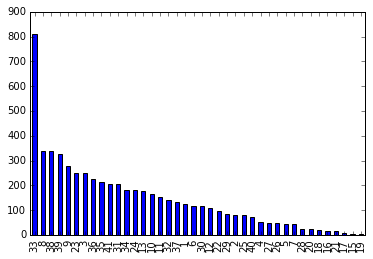

In [59]:
# bar chart showing numbers of customers by subtype
X.MOSTYPE.value_counts().plot(kind='bar')

In [62]:
X[X.CARAVAN==1].MOSTYPE.value_counts()

8     51
33    46
3     25
38    23
39    19
12    16
36    16
13    13
1     13
6     12
9     12
37    10
34     9
10     9
11     9
32     8
35     8
2      6
31     6
41     5
24     5
22     4
30     4
23     4
7      3
20     2
25     2
5      2
4      2
29     2
26     1
27     1
Name: MOSTYPE, dtype: int64

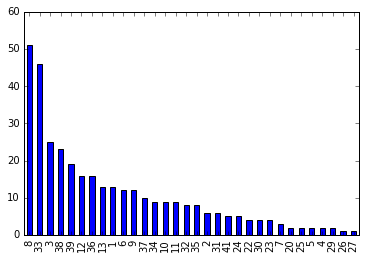

In [65]:
X[X.CARAVAN==1].MOSTYPE.value_counts().plot(kind='bar')

In [39]:
# distinct values in the column MAANTHUI and number of customers
X.MAANTHUI.value_counts()

1     5267
2      505
3       39
7        5
4        2
10       1
6        1
5        1
8        1
Name: MAANTHUI, dtype: int64

In [48]:
5267.00/5822.00

0.904671934043284

In [ ]:
MAANTHUI column represents number of houses. As you can see, 90.4 % percent of customers have just one house

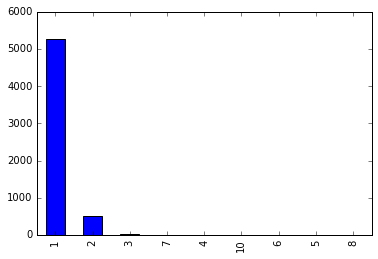

In [42]:
X.MAANTHUI.value_counts().plot(kind='bar')

In [66]:
X[X.CARAVAN==1].MAANTHUI.value_counts()

1    315
2     33
Name: MAANTHUI, dtype: int64

In [ ]:
The customers with a Caravan Insurance have only 1 or 2 houses.

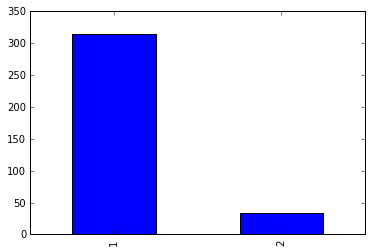

In [67]:
X[X.CARAVAN==1].MAANTHUI.value_counts().plot(kind='bar')

In [75]:
# distinct values in the column MGEMOMV and number of customers
X.MGEMOMV.value_counts()

3    2646
2    2131
4     693
1     284
5      68
Name: MGEMOMV, dtype: int64

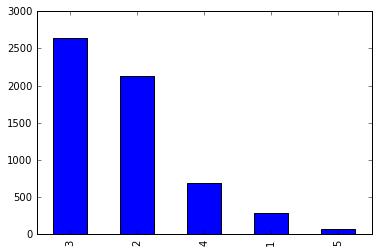

In [68]:
X.MGEMOMV.value_counts().plot(kind='bar')

In [78]:
X[X.CARAVAN==1].MGEMOMV.value_counts()

3    171
2    115
4     50
1      8
5      4
Name: MGEMOMV, dtype: int64

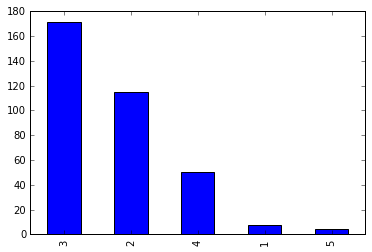

In [77]:
X[X.CARAVAN==1].MGEMOMV.value_counts().plot(kind='bar')

Most customers with Caravan insurance have a average household of 2,3 or 4 people.

In [82]:
# Customers by Avg Age
X.MGEMLEEF.value_counts()

3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: MGEMLEEF, dtype: int64

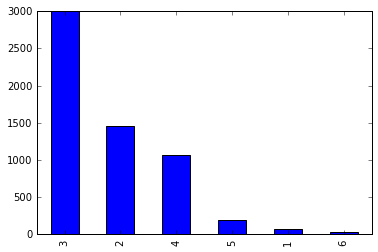

In [83]:
X.MGEMLEEF.value_counts().plot(kind='bar')

In [84]:
X[X.CARAVAN==1].MGEMLEEF.value_counts()

3    183
2     87
4     64
5     12
6      1
1      1
Name: MGEMLEEF, dtype: int64

Here is what each value in column MGEMLEEF means

1 - 20-30 years

2 - 30-40 years

3 - 40-50 years

4 - 50-60 years

5 - 60-70 years

6 - 70-80 years

So most customers with a Caravan insurance are between 30 to 60 years of age

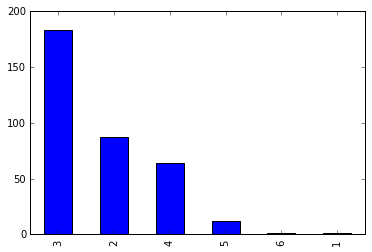

In [85]:
X[X.CARAVAN==1].MGEMLEEF.value_counts().plot(kind='bar')

In [87]:
# Customers by Type
X.MOSHOOFD.value_counts()

8     1563
3      886
9      667
5      569
1      552
7      550
2      502
10     276
6      205
4       52
Name: MOSHOOFD, dtype: int64

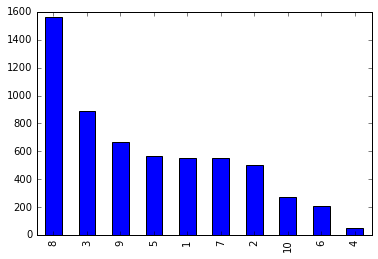

In [88]:
X.MOSHOOFD.value_counts().plot(kind='bar')

In [89]:
X[X.CARAVAN==1].MOSHOOFD.value_counts()

8     89
2     66
3     59
1     48
9     42
7     20
5     15
10     5
6      4
Name: MOSHOOFD, dtype: int64

Here is what each value in column MOSHOOFD means

1 - Successful hedonists

2 - Driven Growers

3 - Average Family

4 - Career Loners

5 - Living well

6 - Cruising Seniors

7 - Retired and Religeous

8 - Family with grown ups

9 - Conservative families

10 - Farmers

So most customers with a Caravan insurance are between 30 to 60 years of age

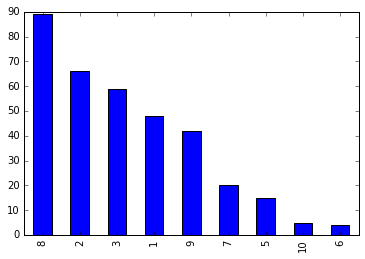

In [90]:
X[X.CARAVAN==1].MOSHOOFD.value_counts().plot(kind='bar')

In [93]:
# Customers with Caravan policy by Roman Catholic
X[X.CARAVAN==1].MGODRK.value_counts()

0    177
1    107
2     54
3      7
6      1
5      1
4      1
Name: MGODRK, dtype: int64

In [ ]:
0  - 0%

1  - 1 - 10%

2  - 11 - 23%

3  - 24 - 36%

4  - 37 - 49%

5  - 50 - 62%

6  - 63 - 75%

7  - 76 - 88%

8  - 89 - 99%

9  - 100%

Customers with Caravan policy are less than 23 % roman catholic

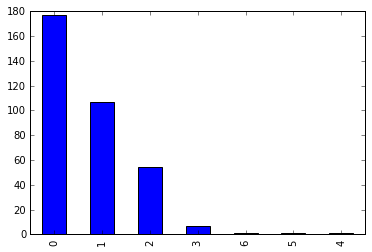

In [92]:
X[X.CARAVAN==1].MGODRK.value_counts().plot(kind='bar')

In [94]:
# Customers with Caravan policy by protestant
X[X.CARAVAN==1].MGODPR.value_counts()

5    97
4    87
7    55
6    39
3    29
2    24
9     8
1     5
8     3
0     1
Name: MGODPR, dtype: int64

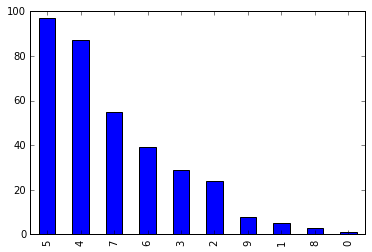

In [95]:
X[X.CARAVAN==1].MGODPR.value_counts().plot(kind='bar')

In [96]:
X[X.CARAVAN==1].MGODOV.value_counts()

0    130
2     99
1     93
3     18
4      7
5      1
Name: MGODOV, dtype: int64

In [97]:
X[X.CARAVAN==1].MGODGE.value_counts()

3    87
4    70
2    69
5    51
0    37
1    21
7     9
6     4
Name: MGODGE, dtype: int64

In [98]:
X[X.CARAVAN==1].MRELGE.value_counts()

7    116
6     71
9     66
5     48
8     25
4     10
3      6
2      3
0      2
1      1
Name: MRELGE, dtype: int64

In [99]:
X[X.CARAVAN==1].MRELSA.value_counts()

0    161
1    120
2     59
3      7
4      1
Name: MRELSA, dtype: int64

In [100]:
X[X.CARAVAN==1].MRELOV.value_counts()

2    110
0     93
3     74
1     33
4     26
5      6
6      4
9      1
7      1
Name: MRELOV, dtype: int64

In [102]:
X[X.CARAVAN==1].MFALLEEN.value_counts()

0    128
2     75
1     64
3     41
4     21
5     13
6      4
8      1
7      1
Name: MFALLEEN, dtype: int64

In [105]:
X[X.CARAVAN==1].MFGEKIND.value_counts()

3    89
4    88
2    57
5    30
6    27
1    24
0    23
7     8
9     1
8     1
Name: MFGEKIND, dtype: int64

In [106]:
X[X.CARAVAN==1].MFWEKIND.value_counts()

4    66
3    59
5    58
6    56
2    39
7    23
8    18
9    14
1    10
0     5
Name: MFWEKIND, dtype: int64

In [107]:
X[X.CARAVAN==1].MOPLHOOG.value_counts()

0    91
1    73
2    70
3    39
4    37
5    21
6     8
7     6
8     2
9     1
Name: MOPLHOOG, dtype: int64

In [108]:
X[X.CARAVAN==1].MBERZELF.value_counts()

0    233
1     82
2     26
5      3
3      3
4      1
Name: MBERZELF, dtype: int64

In [109]:
X[X.CARAVAN==1].MBERBOER.value_counts()

0    284
1     36
2     20
3      6
5      1
4      1
Name: MBERBOER, dtype: int64

In [110]:
X[X.CARAVAN==1].MBERMIDD.value_counts()

2    85
3    68
4    61
0    35
5    33
7    22
1    19
6    17
9     8
Name: MBERMIDD, dtype: int64

In [111]:
X[X.CARAVAN==1].MBERARBG.value_counts()

2    86
1    83
0    77
3    49
4    25
5    13
6     6
7     5
8     3
9     1
Name: MBERARBG, dtype: int64

In [112]:
X[X.CARAVAN==1].MBERARBO.value_counts()

2    82
0    78
1    76
3    50
4    38
5    15
6     6
7     2
8     1
Name: MBERARBO, dtype: int64

In [113]:
X[X.CARAVAN==1].MSKA.value_counts()

0    84
1    80
2    67
3    48
4    29
5    14
7    13
6    12
8     1
Name: MSKA, dtype: int64

In [114]:
X[X.CARAVAN==1].MSKB1.value_counts()

2    101
1     81
0     72
3     65
4     19
6      5
5      4
8      1
Name: MSKB1, dtype: int64

In [115]:
X[X.CARAVAN==1].MSKB2.value_counts()

2    100
3     73
0     58
4     47
1     47
5     17
6      6
Name: MSKB2, dtype: int64

In [116]:
X[X.CARAVAN==1].MSKC.value_counts()

2    71
4    62
3    61
5    46
1    30
6    29
0    25
7    10
8     8
9     6
Name: MSKC, dtype: int64

In [117]:
X[X.CARAVAN==1].MSKD.value_counts()

0    188
1     98
2     40
3     14
4      5
7      1
6      1
5      1
Name: MSKD, dtype: int64

In [118]:
X[X.CARAVAN==1].MHHUUR.value_counts()

0    94
3    39
2    38
1    37
9    31
4    26
5    25
6    23
7    19
8    16
Name: MHHUUR, dtype: int64

In [119]:
X[X.CARAVAN==1].MHKOOP.value_counts()

9    94
6    39
7    38
8    37
0    31
5    26
4    25
3    23
2    19
1    16
Name: MHKOOP, dtype: int64

In [120]:
X[X.CARAVAN==1].MAUT1.value_counts()

7    119
6     91
5     59
9     39
8     19
4     13
3      7
2      1
Name: MAUT1, dtype: int64

In [121]:
X[X.CARAVAN==1].MAUT2.value_counts()

2    112
0    107
1     84
3     22
4     19
5      3
6      1
Name: MAUT2, dtype: int64

In [122]:
X[X.CARAVAN==1].MAUT0.value_counts()

0    121
2    108
3     49
1     48
4     13
6      5
5      4
Name: MAUT0, dtype: int64

In [123]:
X[X.CARAVAN==1].MZFONDS.value_counts()

7    87
5    72
6    45
9    39
8    28
4    28
2    27
3    15
0     7
Name: MZFONDS, dtype: int64

In [124]:
X[X.CARAVAN==1].MZPART.value_counts()

2    87
4    72
3    45
0    39
5    28
1    28
7    27
6    15
9     7
Name: MZPART, dtype: int64

In [125]:
X[X.CARAVAN==1].MINKM30.value_counts()

0    98
2    91
1    54
3    50
4    21
5    17
6     9
7     7
8     1
Name: MINKM30, dtype: int64

In [126]:
X[X.CARAVAN==1].MINK3045.value_counts()

4    84
3    74
2    55
5    45
0    26
6    25
1    18
7    10
9     9
8     2
Name: MINK3045, dtype: int64

In [127]:
X[X.CARAVAN==1].MINK4575.value_counts()

4    88
3    84
2    48
5    41
0    38
1    24
6    11
7     7
9     4
8     3
Name: MINK4575, dtype: int64

In [128]:
X[X.CARAVAN==1].MINK7512.value_counts()

0    152
1     97
2     58
3     19
4     14
5      7
9      1
Name: MINK7512, dtype: int64

In [129]:
X[X.CARAVAN==1].MINK123M.value_counts()

0    289
1     50
2      8
3      1
Name: MINK123M, dtype: int64

In [130]:
X[X.CARAVAN==1].MINKGEM.value_counts()

4    139
5     70
3     69
6     24
2     20
7     17
8      8
1      1
Name: MINKGEM, dtype: int64

In [131]:
X[X.CARAVAN==1].MKOOPKLA.value_counts()

3    71
7    67
6    66
4    46
8    35
5    30
1    18
2    15
Name: MKOOPKLA, dtype: int64

In [132]:
X[X.CARAVAN==1].PWAPART.value_counts()

2    191
0    147
1      8
3      2
Name: PWAPART, dtype: int64

In [133]:
X[X.CARAVAN==1].PWABEDR.value_counts()

0    343
3      3
2      2
Name: PWABEDR, dtype: int64

In [134]:
X[X.CARAVAN==1].PWALAND.value_counts()

0    345
3      2
4      1
Name: PWALAND, dtype: int64

In [135]:
X[X.CARAVAN==1].PPERSAUT.value_counts()

6    262
0     72
5     14
Name: PPERSAUT, dtype: int64

In [ ]:
Here is what each value means:

0 - 0

1 - 1 – 49

2 - 50 – 99

3 - 100 – 199

4 - 200 – 499

5 - 500 – 999

6 - 1000 – 4999

7 - 5000 – 9999

8 - 10.000 - 19.999

9 - 20.000 - ?

Customers who buy pays premium between 1000-4999 is more likely to buy a Caravan insurance

In [136]:
X[X.CARAVAN==1].PBESAUT.value_counts()

0    346
6      2
Name: PBESAUT, dtype: int64

In [137]:
X[X.CARAVAN==1].PMOTSCO.value_counts()

0    332
4      9
5      4
3      2
6      1
Name: PMOTSCO, dtype: int64

In [138]:
X[X.CARAVAN==1].PVRAAUT.value_counts()

0    348
Name: PVRAAUT, dtype: int64

In [139]:
X[X.CARAVAN==1].PAANHANG.value_counts()

0    342
2      5
1      1
Name: PAANHANG, dtype: int64

In [140]:
X[X.CARAVAN==1].PTRACTOR.value_counts()

0    343
5      2
3      2
6      1
Name: PTRACTOR, dtype: int64

In [141]:
X[X.CARAVAN==1].PWERKT.value_counts()

0    348
Name: PWERKT, dtype: int64

In [142]:
X[X.CARAVAN==1].PBROM.value_counts()

0    340
3      6
5      1
2      1
Name: PBROM, dtype: int64

In [143]:
X[X.CARAVAN==1].PLEVEN.value_counts()

0    325
4     11
3      6
5      4
6      2
Name: PLEVEN, dtype: int64

In [144]:
X[X.CARAVAN==1].PPERSONG.value_counts()

0    347
2      1
Name: PPERSONG, dtype: int64

In [145]:
X[X.CARAVAN==1].PGEZONG.value_counts()

0    342
3      4
2      2
Name: PGEZONG, dtype: int64

In [146]:
X[X.CARAVAN==1].PWAOREG.value_counts()

0    344
6      4
Name: PWAOREG, dtype: int64

In [147]:
X[X.CARAVAN==1].PBRAND.value_counts()

4    151
0    109
3     68
5      8
2      6
6      3
1      3
Name: PBRAND, dtype: int64

In [148]:
X[X.CARAVAN==1].PZEILPL.value_counts()

0    347
1      1
Name: PZEILPL, dtype: int64

In [149]:
X[X.CARAVAN==1].PPLEZIER.value_counts()

0    335
4      4
1      3
6      2
3      2
2      2
Name: PPLEZIER, dtype: int64

In [150]:
X[X.CARAVAN==1].PFIETS.value_counts()

0    333
1     15
Name: PFIETS, dtype: int64

In [151]:
X[X.CARAVAN==1].PINBOED.value_counts()

0    343
1      3
2      2
Name: PINBOED, dtype: int64

In [152]:
X[X.CARAVAN==1].PBYSTAND.value_counts()

0    332
4      8
3      4
2      4
Name: PBYSTAND, dtype: int64

In [153]:
X[X.CARAVAN==1].AWAPART.value_counts()

1    201
0    147
Name: AWAPART, dtype: int64

In [154]:
X[X.CARAVAN==1].AWABEDR.value_counts()

0    343
1      5
Name: AWABEDR, dtype: int64

In [155]:
X[X.CARAVAN==1].AWALAND.value_counts()

0    345
1      3
Name: AWALAND, dtype: int64

In [156]:
X[X.CARAVAN==1].APERSAUT.value_counts()

1    237
0     72
2     38
3      1
Name: APERSAUT, dtype: int64

In [157]:
X[X.CARAVAN==1].ABESAUT.value_counts()

0    346
1      2
Name: ABESAUT, dtype: int64

In [158]:
X[X.CARAVAN==1].AMOTSCO.value_counts()

0    332
1     15
2      1
Name: AMOTSCO, dtype: int64

In [159]:
X[X.CARAVAN==1].AVRAAUT.value_counts()

0    348
Name: AVRAAUT, dtype: int64

In [160]:
X[X.CARAVAN==1].AAANHANG.value_counts()

0    342
1      6
Name: AAANHANG, dtype: int64

In [161]:
X[X.CARAVAN==1].ATRACTOR.value_counts()

0    343
1      4
2      1
Name: ATRACTOR, dtype: int64

In [162]:
X[X.CARAVAN==1].AWERKT.value_counts()

0    348
Name: AWERKT, dtype: int64

In [163]:
X[X.CARAVAN==1].ABROM.value_counts()

0    340
1      8
Name: ABROM, dtype: int64

So customers who have a 0 moped policies are more likely to buy a Caravan insurance

In [164]:
X[X.CARAVAN==1].ALEVEN.value_counts()

0    325
2     10
1      8
4      3
3      2
Name: ALEVEN, dtype: int64

So customers who have a 0 life insurance policies are more likely to buy a Caravan insurance

In [165]:
X[X.CARAVAN==1].APERSONG.value_counts()

0    347
1      1
Name: APERSONG, dtype: int64

So customers who have a 0 private accident policies are more likely to buy a Caravan insurance

In [166]:
X[X.CARAVAN==1].AGEZONG.value_counts()

0    342
1      6
Name: AGEZONG, dtype: int64

So customers who have a 0 family accident policies are more likely to buy a Caravan insurance

In [167]:
# Caravan policies by disability insurance policies
X[X.CARAVAN==1].AWAOREG.value_counts()

0    344
1      4
Name: AWAOREG, dtype: int64

So customers who have a 0 disability policies are more likely to buy a Caravan insurance

In [168]:
# Caravan policies by fire policies
X[X.CARAVAN==1].ABRAND.value_counts()

1    232
0    109
2      7
Name: ABRAND, dtype: int64

So customers who have a 0 or 1 fire policies are more likely to buy a Caravan insurance

In [169]:
# Caravan policies by surfboard policies
X[X.CARAVAN==1].AZEILPL.value_counts()

0    347
1      1
Name: AZEILPL, dtype: int64

So customers who doesnt have a surfboard policy are more likely to buy a Caravan insurance

In [170]:
# Caravan policies by boat policies
X[X.CARAVAN==1].APLEZIER.value_counts()

0    335
1     12
2      1
Name: APLEZIER, dtype: int64

So customers who doesnt have a boat policy are more likely to buy a Caravan insurance

In [171]:
# Caravan policies by bicycle policies
X[X.CARAVAN==1].AFIETS.value_counts()

0    333
1     10
2      4
3      1
Name: AFIETS, dtype: int64

Customers with no bicycle policies are more likey to buy Caravan insurance

In [172]:
# Number of property insurance policies
X[X.CARAVAN==1].AINBOED.value_counts()

0    343
1      5
Name: AINBOED, dtype: int64

Customers without property insurance policies are most likey to buy a caravan insurance.

In [173]:
#Policies by social security insurance policies
X[X.CARAVAN==1].ABYSTAND.value_counts()

0    332
1     16
Name: ABYSTAND, dtype: int64

Customers who does not buy a Social Security Insurance policy are most likely to buy a Caravan insurance policy.

# Prediction

We will be using a Random Forest Regressor for predicton.Let first create a benchmark model and see how important each of the variables provided in train data are. Lets start with 100 estimators first

In [538]:
benchmark_model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
benchmark_model.fit(X, y)
print "C-stat: ", roc_auc_score(y, benchmark_model.oob_prediction_)

C-stat:  0.687175582377


In [539]:
benchmark_model.feature_importances_

array([  4.25105420e-02,   5.11001527e-03,   7.21746096e-03,
         1.23659074e-02,   1.76536312e-02,   1.08793097e-02,
         1.85854770e-02,   1.50268985e-02,   2.01260466e-02,
         1.38902971e-02,   8.42824045e-03,   1.21771533e-02,
         1.43026556e-02,   1.94048281e-02,   1.96398193e-02,
         1.96902590e-02,   1.98811603e-02,   1.96845840e-02,
         1.64315664e-02,   1.19657238e-02,   7.28548855e-03,
         2.24506697e-02,   1.91354603e-02,   1.93457562e-02,
         1.35304250e-02,   1.52208184e-02,   1.57010329e-02,
         1.78442294e-02,   1.32585762e-02,   1.17310522e-02,
         1.26226818e-02,   1.20717501e-02,   1.19385330e-02,
         1.21874840e-02,   1.14732573e-02,   1.09906646e-02,
         1.28966256e-02,   1.88586468e-02,   1.79583611e-02,
         1.71645552e-02,   5.78173210e-03,   1.15732184e-02,
         2.82382597e-02,   3.38994720e-02,   2.72230419e-03,
         2.73081872e-04,   4.11462783e-02,   1.49004184e-03,
         8.01630672e-03,

C:\Users\doranala493\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


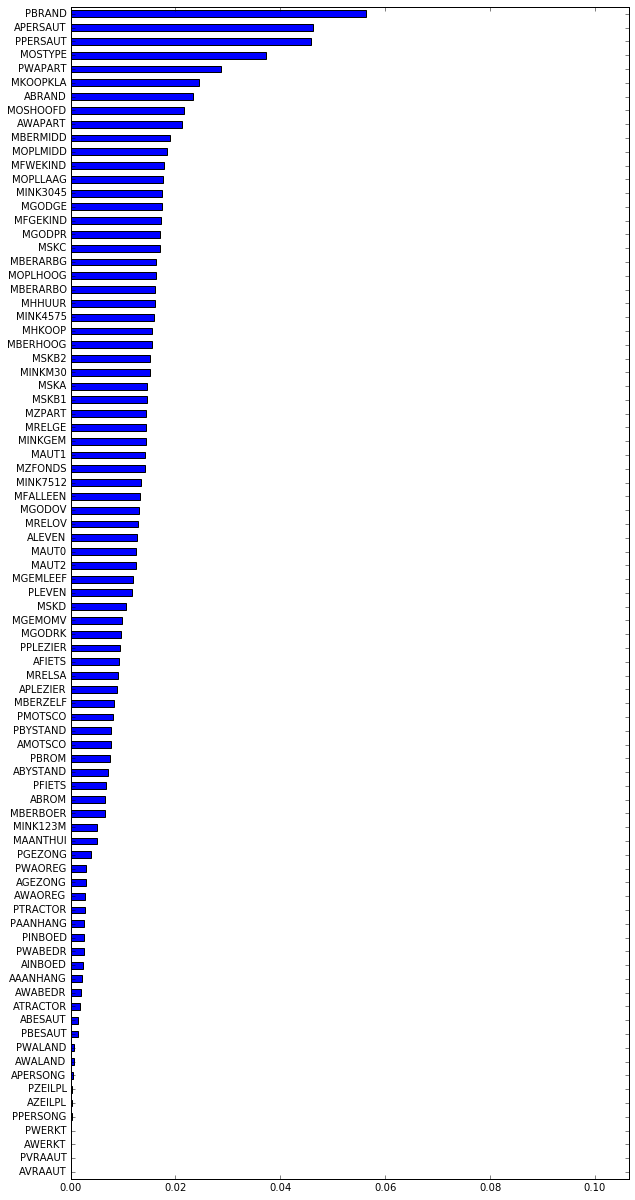

In [540]:
# graph that shows the importance of each variable

def graph_feature_importances(benchmark_model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """ 
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(benchmark_model, X.columns, summarized_columns=None)

In [580]:
# Remove variables that doesn't have any importance
X = X.drop(['AVRAAUT','PVRAAUT','AWERKT','PWERKT'
                  ,'PPERSONG','ABESAUT','APERSONG','PBESAUT','AWALAND','PWALAND','AZEILPL','PZEILPL'], axis=1)
Xtest = Xtest.drop(['AVRAAUT','PVRAAUT','AWERKT','PWERKT'
                  ,'PPERSONG','ABESAUT','APERSONG','PBESAUT','AWALAND','PWALAND','AZEILPL','PZEILPL'], axis=1)

In [545]:
# train the model and see score
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.698668785355


We have a slight increase in our AUC score

# Optimizing parameters

First we will optimize the n_jobs parameter. For this we will use %%timeit to see which will take less time to execute

In [533]:

%%timeit
model = RandomForestRegressor(100, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1 loops, best of 3: 12.6 s per loop


In [534]:
%%timeit
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1 loops, best of 3: 6.3 s per loop


njobs = -1 is more faster than njobs = 1

Now lets optimize n_estimtor_options. Loop over different values from a list and see which value yields highest auc

400 trees
C-stat:  0.71366102663

500 trees
C-stat:  0.718309437718

600 trees
C-stat:  0.718392904388

700 trees
C-stat:  0.718214684674

800 trees
C-stat:  0.71767425111



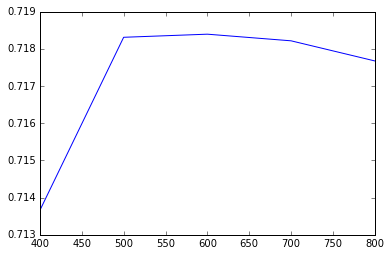

In [581]:
results = []
n_estimator_options = [400, 500 ,600, 700, 800]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

598 trees
C-stat:  0.718549338776

599 trees
C-stat:  0.718431750511

601 trees
C-stat:  0.718408652816

602 trees
C-stat:  0.718534640243

607 trees
C-stat:  0.71834408426



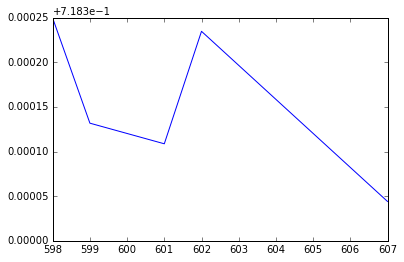

In [547]:
results = []
n_estimator_options = [598,599,601,602,607]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

Optimize max_featuress_options

auto option
C-stat:  0.718549338776

None option
C-stat:  0.718549338776

sqrt option
C-stat:  0.703664711762

log2 option
C-stat:  0.699518150589

0.9 option
C-stat:  0.712526089896

0.7 option
C-stat:  0.708789512807

0.5 option
C-stat:  0.697762200832

0.3 option
C-stat:  0.707160337898

0.2 option
C-stat:  0.706965319861



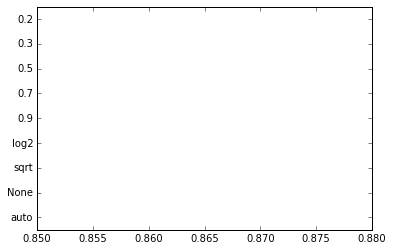

In [548]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.7, 0.5, 0.3, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=598, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

optimize min_samples_leaf_options

1 min samples
C-stat:  0.718549338776

2 min samples
C-stat:  0.722535528454

3 min samples
C-stat:  0.728206275014

4 min samples
C-stat:  0.730174303605

5 min samples
C-stat:  0.734645807348

6 min samples
C-stat:  0.737583151701

7 min samples
C-stat:  0.740987436954

8 min samples
C-stat:  0.741921581226

9 min samples
C-stat:  0.742980400556

10 min samples
C-stat:  0.742074865928



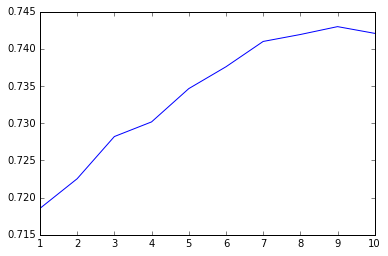

In [549]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=598, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

# Final Model

In [551]:
model = RandomForestRegressor(n_estimators=598, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=9)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.742980400556


In [566]:
# predict the target values for test dataset using our model
ytest = model.predict(Xtest)

In [567]:
ytest

array([ 0.03256913,  0.32604644,  0.1266219 , ...,  0.10486162,
        0.07813054,  0.05153281])

In [571]:
# write the predictions into a file
pd.DataFrame(ytest).to_csv('H:/Linux/tic/CaravanPredictions.csv')

# Conclusion

Succesfully predicted whether a person is a potential customer for buying a caravan insurance using random forest Algorithm.